<a href="https://colab.research.google.com/github/zeynepiremkesler/Designing-AI-for-Plant-Image-Detection-and-User-Interface/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
data_directory = "/content/drive/MyDrive/dataset"


In [39]:
%cd "/content/drive/MyDrive/dataset"


/content/drive/MyDrive/dataset


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [41]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

batch_size = 32

In [42]:
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 710 images belonging to 3 classes.
Found 176 images belonging to 3 classes.


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
23/23 [==============================] - 97s 4s/step - loss: 1.2707 - accuracy: 0.6972 - val_loss: 0.7434 - val_accuracy: 0.7500
Epoch 2/10
23/23 [==============================] - 101s 4s/step - loss: 0.7211 - accuracy: 0.7479 - val_loss: 0.7724 - val_accuracy: 0.7500
Epoch 3/10
23/23 [==============================] - 99s 4s/step - loss: 0.7053 - accuracy: 0.7479 - val_loss: 0.7197 - val_accuracy: 0.7500
Epoch 4/10
23/23 [==============================] - 100s 4s/step - loss: 0.7129 - accuracy: 0.7479 - val_loss: 0.7779 - val_accuracy: 0.7500
Epoch 5/10
23/23 [==============================] - 102s 4s/step - loss: 0.6331 - accuracy: 0.7549 - val_loss: 0.8957 - val_accuracy: 0.7500
Epoch 6/10
23/23 [==============================] - 100s 4s/step - loss: 0.5378 - accuracy: 0.7761 - val_loss: 1.2185 - val_accuracy: 0.7330
Epoch 7/10
23/23 [==============================] - 101s 4s/step - loss: 0.4337 - accuracy: 0.8099 - val_loss: 1.5674 - val_accuracy: 0.7102
Epoch 8/10
23/2

In [46]:
import matplotlib.pyplot as plt

In [47]:
# Eğitim ve doğrulama loss'unun grafiğini çizme
loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
epochs = range(1, len(loss) + 1)

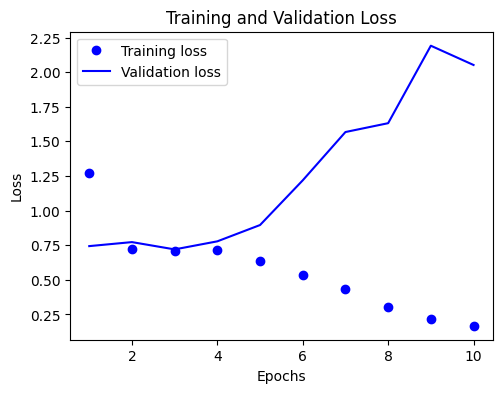

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [50]:
# Eğitim ve doğrulama accuracy'nin grafiğini çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

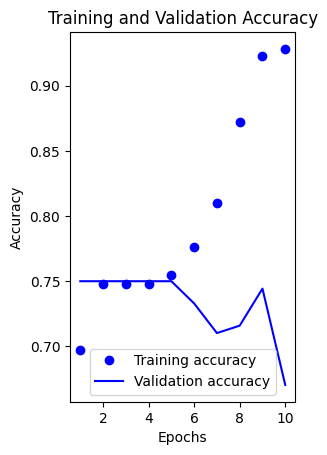

In [51]:
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
# Create the test_generator variable
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [55]:
# Now the test_generator variable is defined
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "from google.colab import drive\ndrive.mount('/content/drive')", 'import tensorflow', "# VGG16 is a pre-trained CNN model. \nconv_base = tensorflow.keras.applications.VGG16(weights='imagenet',\n                  include_top=False,\n                  input_shape=(224, 224, 3)\n                  )", '# Showing the convolutional layers.\nconv_base.summary()', "# Deciding which layers are trained and frozen.\n# Until 'block5_conv1' are frozen.\nconv_base.trainable = True\nset_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block5_conv1':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False", '# An empyty model is created.\nmo

In [59]:
# Veri setinizin bulunduğu dizini belirtin
test_data_directory = "/content/drive/MyDrive/dataset"

# Test veri setini yükleyin ve ön işleme yapın
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # Eğer etiketleriniz kategorik ise bu parametreyi bu şekilde bırakabilirsiniz
)

# Modeli test verisiyle değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Found 886 images belonging to 3 classes.
28/28 [==============================] - 38s 1s/step - loss: 0.5169 - accuracy: 0.8939
Test Loss: 0.5168923139572144, Test Accuracy: 0.8939051628112793


In [108]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Örnek bir görüntüyü model ile tahmin etme
sample_image_path = "/content/drive/MyDrive/dataset1/test/img_8.jpg"
img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Bir batch boyutu ekleyin

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted Class: {predicted_class}")



1/1 [==============================] - 0s 67ms/step
Predicted Class: 1


In [113]:
# Modeli kaydet
model.save('/content/drive/MyDrive/models/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
